In [2]:
%matplotlib inline
import imageio
import requests
import matplotlib.pyplot as plt
import IPython.display as dp

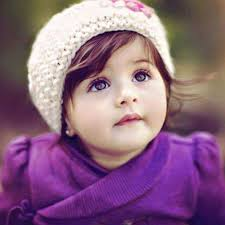

In [98]:
#Display the image from the web using an URI.
img="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQvXFtCut8YysKZIPBcGqd3TOMBdSW9n4HfXg&usqp=CAU"
dp.Image(requests.get(img).content)

In [99]:
source_img = imageio.imread(img)

In [100]:
import numpy as np

def grayscaleimg(rgb): 
  return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

gryscl_img = grayscaleimg(source_img)

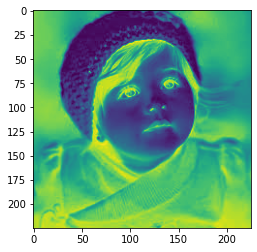

In [101]:
inv_img = (255 - gryscl_img)
plt.imshow(inv_img);

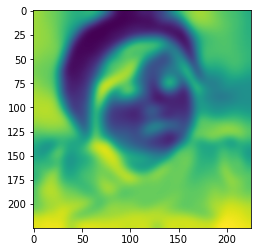

In [102]:
import scipy.ndimage
blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img, sigma=5)
plt.imshow(blurred_img);

In [103]:

#Create function to perform dogding(belnding together greyscale and blurred image)
def dodging(blur_img, gryscl_img):
    resultant_dodge=blur_img*255/(255-gryscl_img) 
    resultant_dodge[resultant_dodge>255]=255
    resultant_dodge[gryscl_img==255]=255
    return resultant_dodge.astype('uint8')

In [104]:
target_img= dodging(blurred_img, gryscl_img)

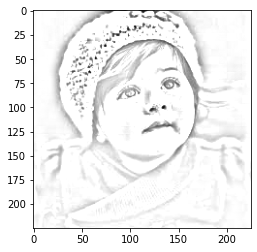

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(target_img, cmap="gray");

In [107]:
plt.imsave('sketch_image.png', target_img, cmap='gray', vmin=0, vmax=255)